In [1]:
from striplog import Lexicon, Striplog

## use default lexicon

In [2]:
lexicon = Lexicon.default()

## create a striplog from a LAS file

In [3]:
with open('test.las', 'r') as las3:
    strip = Striplog.from_las3(las3.read(), lexicon)

## examine the default lexicon

In [49]:
lexicon

{'lithology': ['overburden', 'sandstone', 'siltstone', 'shale', 'mudstone', 'limestone', 'dolomite', 'salt', 'halite', 'anhydrite', 'gypsum', 'sylvite', 'clay', 'mud', 'silt', 'sand', 'gravel', 'boulders'], 'amount': ['streaks?', 'veins?', 'stringers?', 'interbed(?:s|ded)?', 'blotch(?:es)?', 'bands?', 'fragments?', 'impurit(?:y|ies)', 'minor', 'some', 'abundant', 'rare', 'flakes?', '[-\\.\\d]+%'], 'grainsize': ['vf(?:-)?', 'f(?:-)?', 'm(?:-)?', 'c(?:-)?', 'vc', 'very fine(?: to)?', 'fine(?: to)?', 'medium(?: to)?', 'coarse(?: to)?', 'very coarse', 'v fine(?: to)?', 'med(?: to)?', 'med.(?: to)?', 'v coarse', 'grains?', 'granules?', 'pebbles?', 'cobbles?', 'boulders?'], 'colour': ['red(?:dish)?', 'gray(?:ish)?', 'grey(?:ish)?', 'black(?:ish)?', 'whit(?:e|ish)', 'blu(?:e|ish)', 'purpl(?:e|ish)', 'yellow(?:ish)?', 'green(?:ish)?', 'brown(?:ish)?', 'light', 'dark', 'sandy'], 'synonyms': {'Overburden': ['Drift'], 'Anhydrite': ['Gypsum'], 'Salt': ['Halite', 'Sylvite']}, 'splitters': [' with '

In [50]:
type(lexicon)

striplog.lexicon.Lexicon

In [57]:
lexicon.get_component('red fine grained interbedded sandstone with white clay')

{'lithology': 'sandstone',
 'amount': 'interbedded',
 'grainsize': 'fine',
 'colour': 'red'}

In [59]:
for i in lexicon.split_description('red fine grained interbedded sandstone with white clay'):
    print(lexicon.get_component(i))

{'lithology': 'sandstone', 'amount': 'interbedded', 'grainsize': 'fine', 'colour': 'red'}
{'lithology': 'clay', 'amount': None, 'grainsize': None, 'colour': 'white'}


## examine the strip object

### object itself

In [4]:
strip

Striplog(25 Intervals, start=14.3, stop=135.9)

In [8]:
type(strip)

striplog.striplog.Striplog

In [29]:
strip.read_at(51)

Interval({'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]})

### first interval

In [9]:
first_interval = strip[0]
first_interval

Interval({'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]})

In [10]:
type(first_interval)

striplog.interval.Interval

an interval has a base and a top

In [14]:
base = first_interval.base
base

upper,51.24117647058824
middle,51.24117647058824
lower,51.24117647058824


### base and top are instances of the Position class 

In [15]:
type(base)

striplog.position.Position

In [24]:
base.z

51.24117647058824

## plot the strip
the colours depend on the interval components

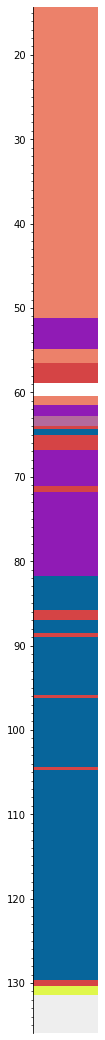

In [25]:
strip.plot()

### components of first interval

In [32]:
comp = first_interval.components
comp

[Component({'lithology': 'anhydrite'})]

In [41]:
primary_comp = first_interval.primary

In [42]:
type(primary_comp)

striplog.component.Component

In [43]:
primary_comp

lithology,anhydrite


### all components present into a Striplog object

In [45]:
strip.components

[Component({'lithology': 'siltstone', 'colour': 'grey'}),
 Component({'lithology': 'anhydrite'}),
 Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'}),
 Component({'lithology': 'dolomite'}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'limestone'})]

## convert a Striplog object to lists

In [44]:
a_log, a_basis, a_components = strip.to_log(return_meta=True)

In [46]:
a_log

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 4,
       4, 4, 0, 2, 3, 6, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 7, 5, 5, 5, 5, 5])

In [48]:
a_basis

array([ 14.3       ,  15.29672131,  16.29344262,  17.29016393,
        18.28688525,  19.28360656,  20.28032787,  21.27704918,
        22.27377049,  23.2704918 ,  24.26721311,  25.26393443,
        26.26065574,  27.25737705,  28.25409836,  29.25081967,
        30.24754098,  31.2442623 ,  32.24098361,  33.23770492,
        34.23442623,  35.23114754,  36.22786885,  37.22459016,
        38.22131148,  39.21803279,  40.2147541 ,  41.21147541,
        42.20819672,  43.20491803,  44.20163934,  45.19836066,
        46.19508197,  47.19180328,  48.18852459,  49.1852459 ,
        50.18196721,  51.17868852,  52.17540984,  53.17213115,
        54.16885246,  55.16557377,  56.16229508,  57.15901639,
        58.1557377 ,  59.15245902,  60.14918033,  61.14590164,
        62.14262295,  63.13934426,  64.13606557,  65.13278689,
        66.1295082 ,  67.12622951,  68.12295082,  69.11967213,
        70.11639344,  71.11311475,  72.10983607,  73.10655738,
        74.10327869,  75.1       ,  76.09672131,  77.09

In [47]:
a_components

[Component({'lithology': 'siltstone', 'colour': 'grey'}),
 Component({'lithology': 'anhydrite'}),
 Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'}),
 Component({'lithology': 'dolomite'}),
 Component({}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'limestone'})]

In [37]:
strip3.components

[Component({'lithology': 'siltstone', 'colour': 'grey'}),
 Component({'lithology': 'anhydrite'}),
 Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'}),
 Component({'lithology': 'dolomite'}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'limestone'})]

In [41]:
a_log

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 4,
       4, 4, 0, 2, 3, 6, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 7, 5, 5, 5, 5, 5])

In [16]:
strip4 = Striplog.from_log(a_log, components=a_components, basis=a_basis)

In [36]:
strip4[0].primary

lithology,sandstone
grainsize,vf-f
colour,grey


In [40]:
a_components

[Component({'lithology': 'siltstone', 'colour': 'grey'}),
 Component({'lithology': 'anhydrite'}),
 Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'}),
 Component({'lithology': 'dolomite'}),
 Component({}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'limestone'})]

In [38]:
strip4.components

[Component({'lithology': 'anhydrite'}),
 Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'}),
 Component({'lithology': 'dolomite'}),
 Component({'lithology': 'siltstone', 'colour': 'red'}),
 Component({'lithology': 'siltstone', 'colour': 'grey'}),
 Component({'lithology': 'limestone'})]

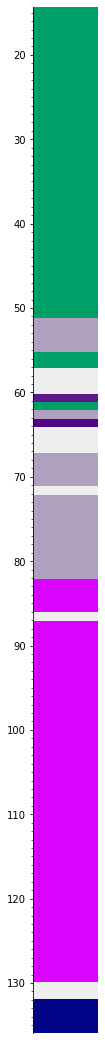

In [17]:
strip4.plot()

In [18]:
interval_0 = strip4[0]

In [24]:
interval_0.components

[Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'})]

In [83]:
len(strip4)

18

In [87]:
for i in strip4:
    print(i.top)

{'middle': 14.3, 'units': 'm'}
{'middle': 51.17868852459017, 'units': 'm'}
{'middle': 55.165573770491804, 'units': 'm'}
{'middle': 57.15901639344263, 'units': 'm'}
{'middle': 60.14918032786885, 'units': 'm'}
{'middle': 61.14590163934426, 'units': 'm'}
{'middle': 62.14262295081967, 'units': 'm'}
{'middle': 63.13934426229508, 'units': 'm'}
{'middle': 64.1360655737705, 'units': 'm'}
{'middle': 67.12622950819673, 'units': 'm'}
{'middle': 71.11311475409836, 'units': 'm'}
{'middle': 72.10983606557377, 'units': 'm'}
{'middle': 82.07704918032786, 'units': 'm'}
{'middle': 86.06393442622951, 'units': 'm'}
{'middle': 87.06065573770492, 'units': 'm'}
{'middle': 129.91967213114754, 'units': 'm'}
{'middle': 130.91639344262296, 'units': 'm'}
{'middle': 131.91311475409836, 'units': 'm'}


In [43]:
type(strip3[0])

striplog.interval.Interval